In [10]:
## IMPORTS

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import copy

from keras import models
from keras import layers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn import preprocessing
# from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

import imblearn

import os

In [11]:
## FONCTIONS ET VARIABLES UTILES

# def read_text_file(file_path):
#     with open(file_path, encoding='ISO-8859-1') as f:
#         lines = f.readlines()
#         return lines
        
def read_number_line(some_line):
    return [float(s) for s in some_line.split()]

my_dpi = np.sqrt(1920**2 + 1080**2)/17.3 #dpi de l'écran

On tente tout d'abord une approche par clustering pour séparer les signaux bruités des autres de manière non supervisée:

In [12]:
## IMPORT DES DONNEES

train_folder = "C:/Users/victo/stage_navier_jupyter/data_eurotunnel/data_png/training_png/"
val_folder = "C:/Users/victo/stage_navier_jupyter/data_eurotunnel/data_png/validation_png/"

pk_folder_train = "1775_20190128/"
pk_folder_val = "4250_20190225/"

train_path = train_folder + pk_folder_train
val_path = val_folder + pk_folder_val

buffer

In [13]:
## ON TEST SUR UN DOSSIER ENTIER POUR VOIR LE TEMPS DE CALCUL

x_train = []

os.chdir(train_folder+pk_folder_train)
for file_name in os.listdir():
    if file_name.endswith("vitesse.png"):
        img_path = train_folder + pk_folder_train + "/" + file_name
        img = image.load_img(img_path, target_size=(600, 400))
        x = image.img_to_array(img)
        x = x.reshape((1,) + x.shape)
        x = np.divide(x, 255.)
        x_train.append(x)
        
x_train_array = np.array(x_train)
example = x_train_array[42]
print(example[0, 372, 257, 2])

prod = 1
for i in range(1, len(x_train_array.shape)):
    prod *= x_train_array.shape[i]
    print(prod)
x_train_array = np.reshape(x_train_array, (x_train_array.shape[0], prod))

print(x_train_array.shape)

kmeans_4 = KMeans(n_clusters=4, n_init=20)
y_pred_kmeans_4 = kmeans_4.fit_predict(x_train_array)

print(y_pred_kmeans_4)



1.0
1
600
240000
720000
(162, 720000)
[3 1 2 2 2 1 1 0 0 0 2 3 2 0 3 3 2 0 2 3 2 2 3 2 0 2 1 1 0 2 2 1 0 0 1 3 1
 3 2 3 2 3 0 0 2 1 0 2 0 1 2 2 2 2 2 1 1 1 2 2 2 2 2 0 2 3 1 2 2 1 2 2 2 2
 2 1 1 2 3 3 1 2 1 2 1 1 0 0 1 1 1 1 0 3 1 1 3 0 1 0 1 1 1 1 1 0 1 0 0 0 3
 3 0 0 0 3 0 3 3 0 3 3 2 1 1 0 3 1 1 0 0 2 3 2 3 3 0 2 1 3 0 1 1 3 1 3 3 3
 3 0 3 1 3 3 3 0 1 1 1 1 1 3]


On évalue comment s'est fait ce clustering en affichant d'abord toutes les images de la classe "3", puis toutes celles de la classe "2", puis toutes celles de la classe "1", puis toutes celles de la classe "0"

37
019


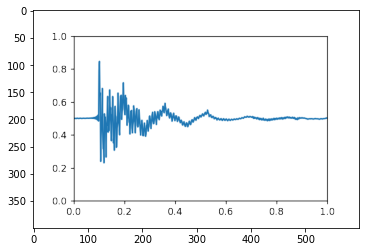

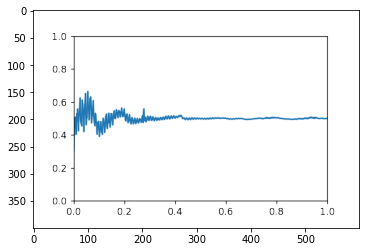

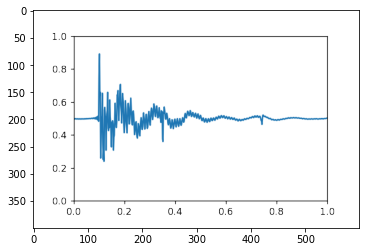

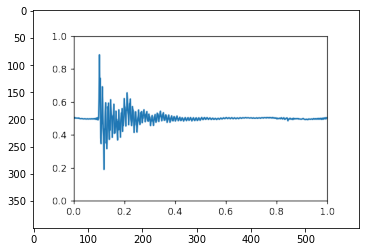

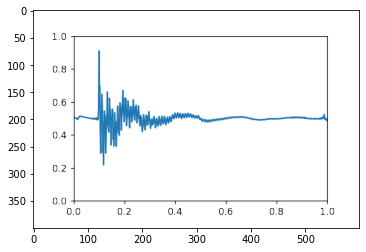

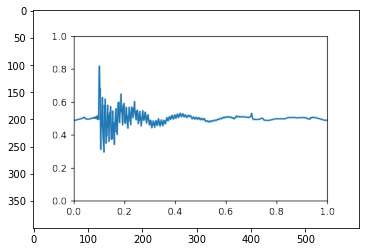

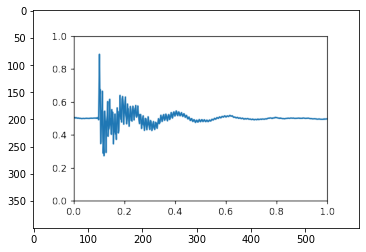

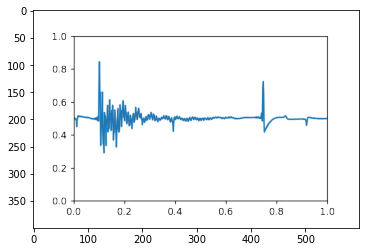

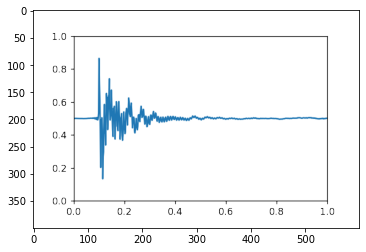

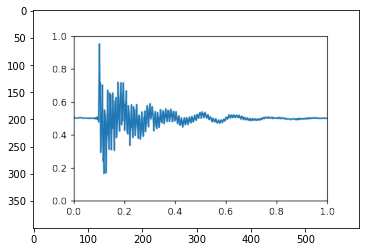

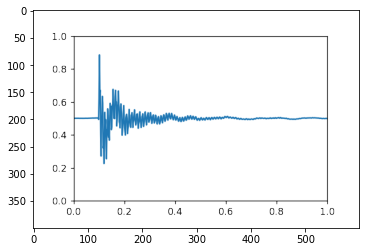

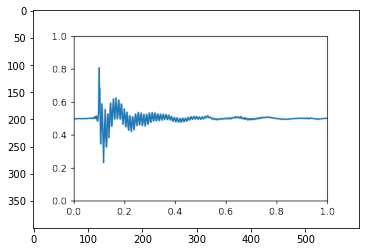

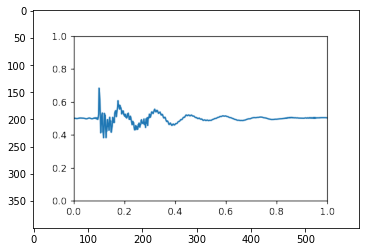

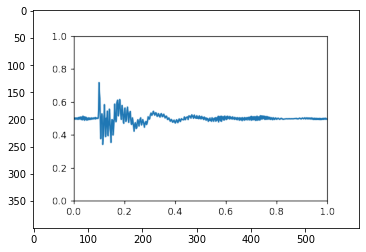

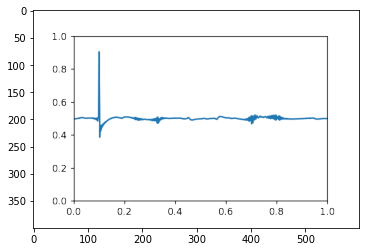

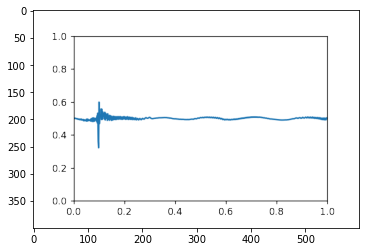

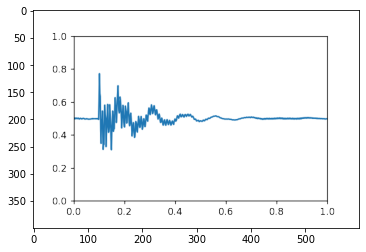

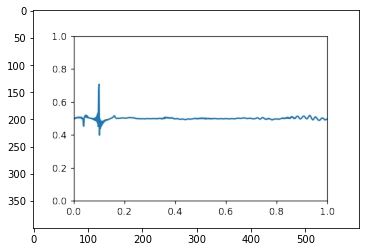

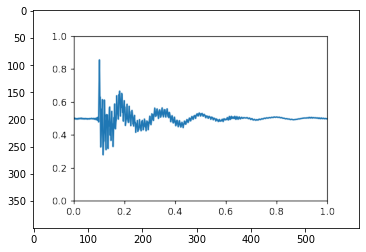

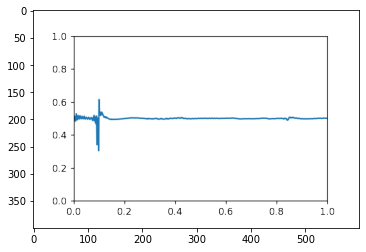

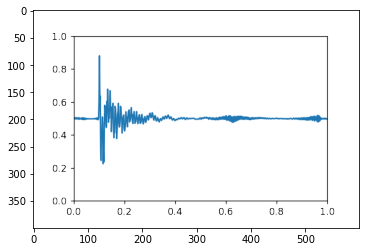

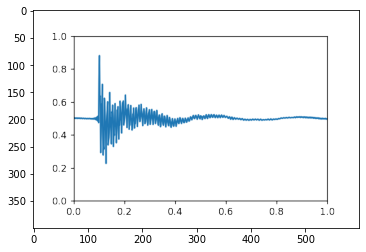

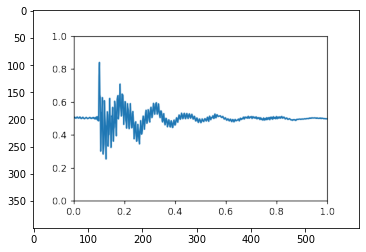

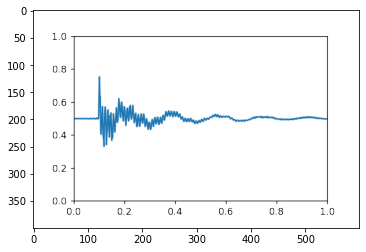

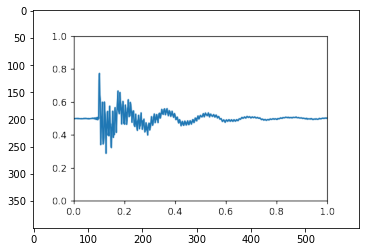

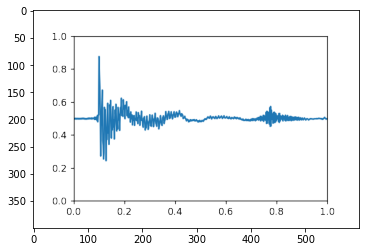

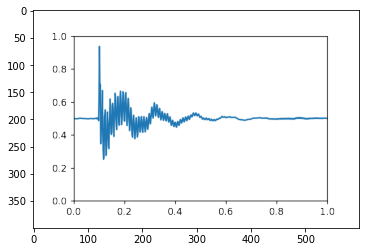

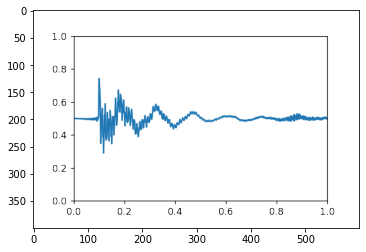

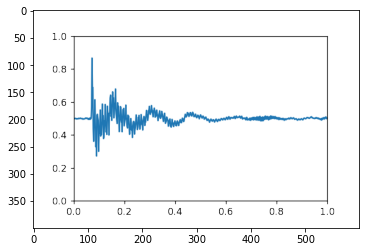

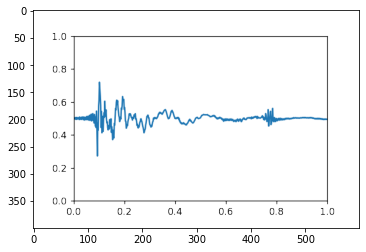

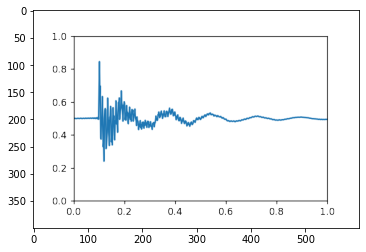

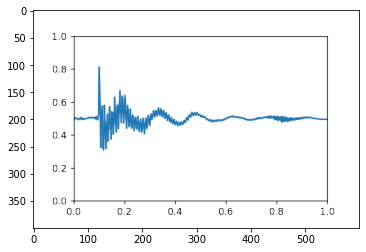

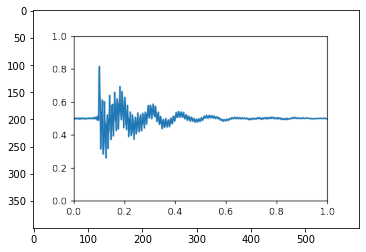

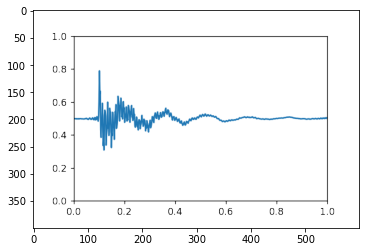

In [14]:
##AFFICHAGE DE LA CLASSE "3"

# print(y_pred_kmeans_4[0]) #c'est bien un 1
# print(len(y_pred_kmeans_4)) #c'est bien 162

tri_ind = []
for i in range(len(y_pred_kmeans_4)):
    if y_pred_kmeans_4[i] == 3:
        tri_ind.append(i)

print(len(tri_ind)) #55

tri_ind_str = [str(x).zfill(3) for x in tri_ind]

print(tri_ind_str[4]) #027

os.chdir(train_folder+pk_folder_train)
for file_name in os.listdir():
    if file_name.endswith("_vitesse.png"):
        prefix = file_name[:3] #_D_ ou _G_
        infix = file_name[3:6] #numéro du blochet
        
        if prefix == '_D_':
            if infix in tri_ind_str:
                img = mpimg.imread(train_folder+pk_folder_train+file_name)
                imgplot = plt.imshow(img)
                plt.show()
        
        elif prefix == '_G_':
            nfx = int(infix)
            nfx += (len(y_pred_kmeans_4) // 2)
            infix = str(nfx) #ceux de gauche sont lus après tous ceux de droite
            if infix in tri_ind_str:
                img = mpimg.imread(train_folder+pk_folder_train+file_name)
                imgplot = plt.imshow(img)
                plt.show()

42
012


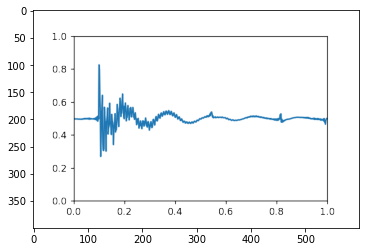

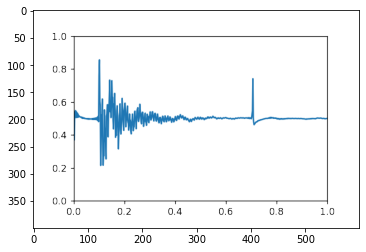

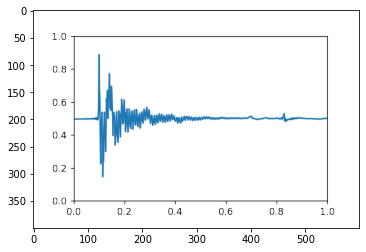

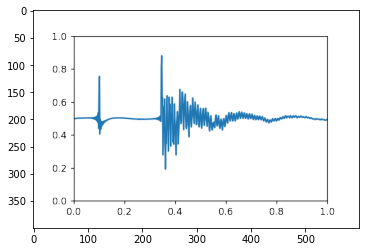

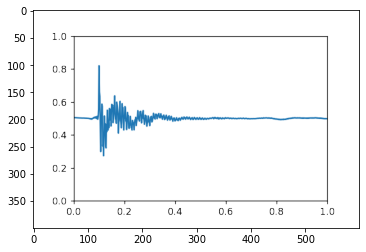

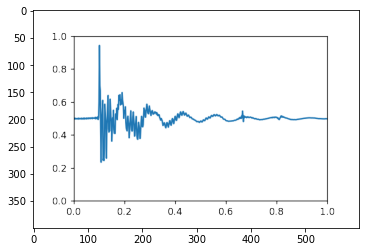

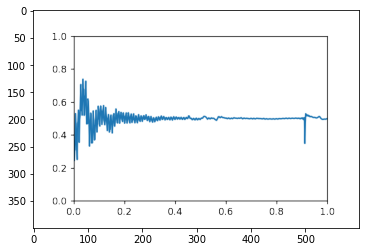

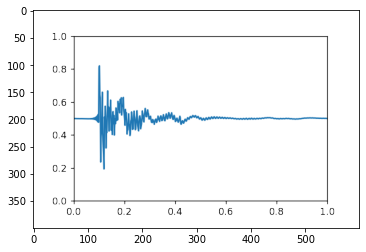

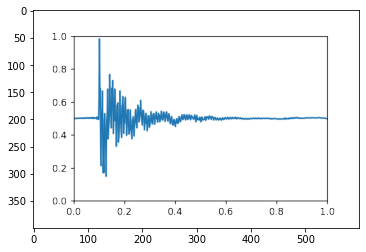

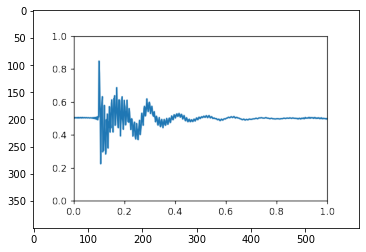

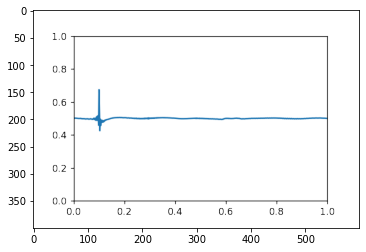

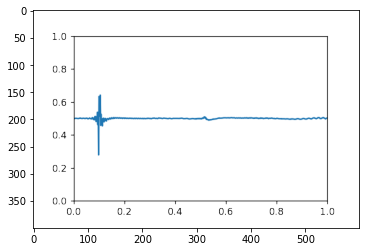

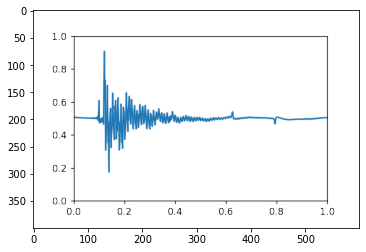

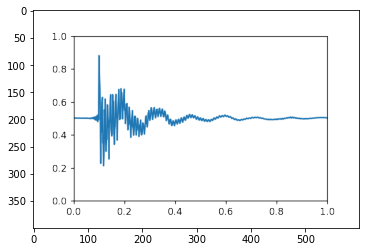

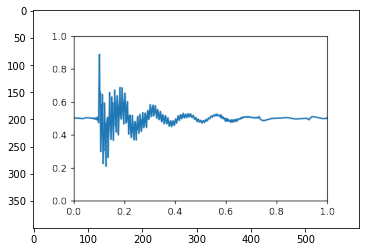

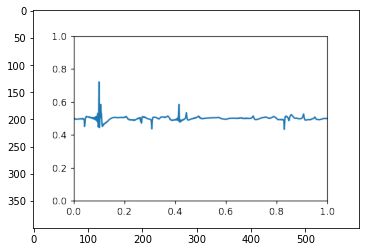

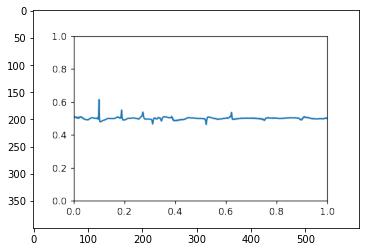

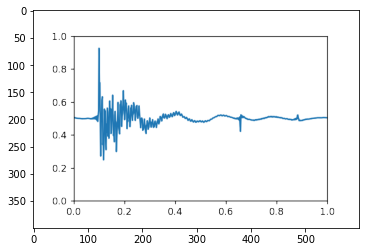

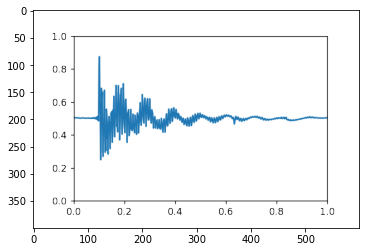

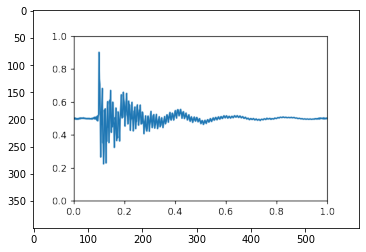

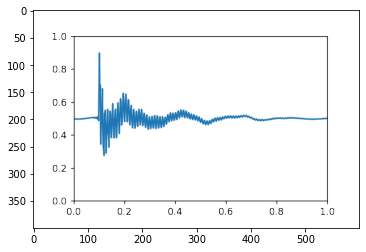

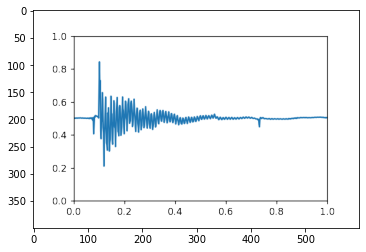

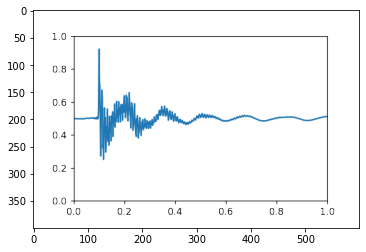

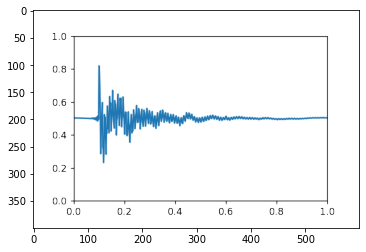

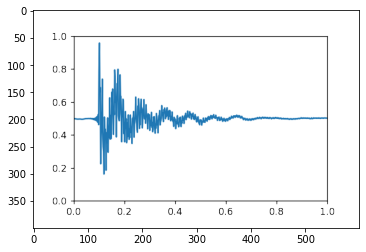

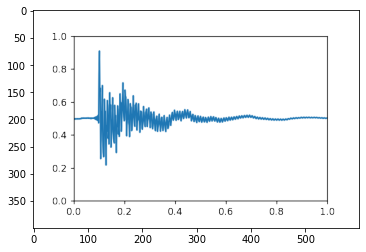

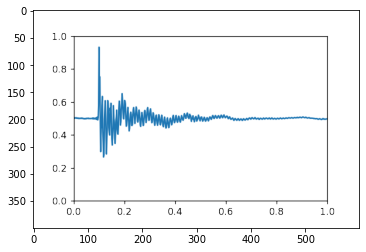

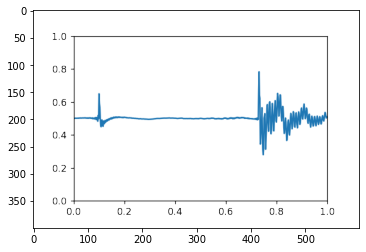

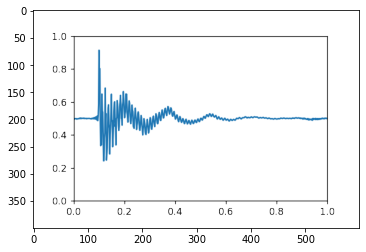

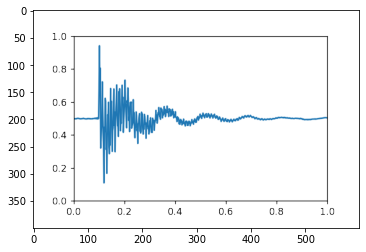

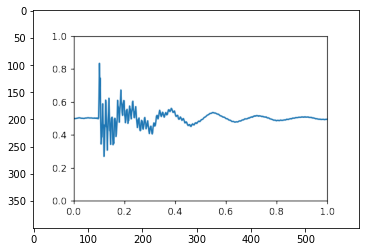

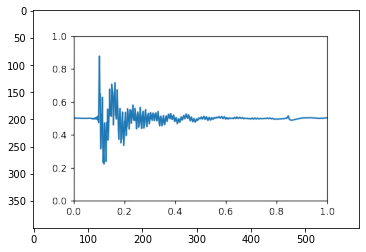

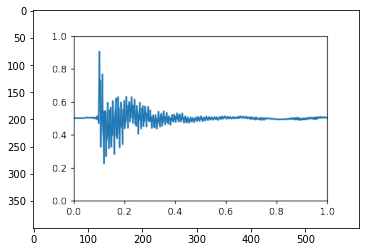

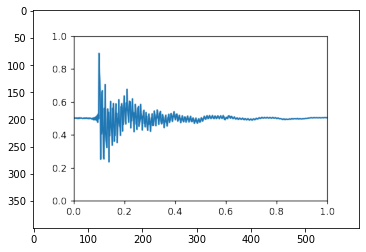

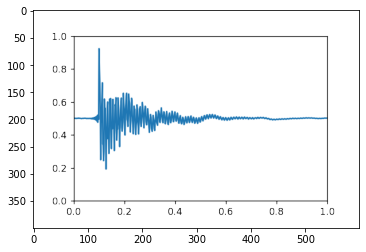

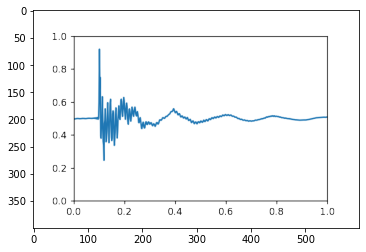

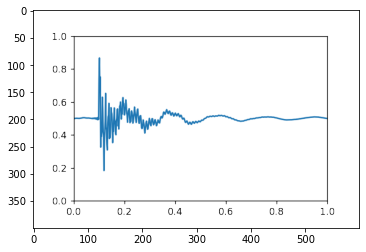

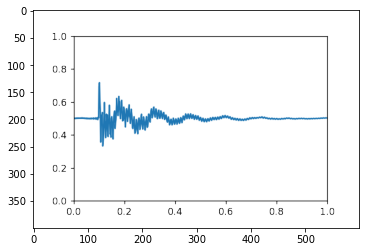

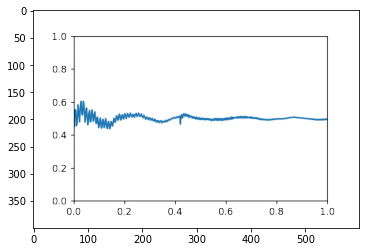

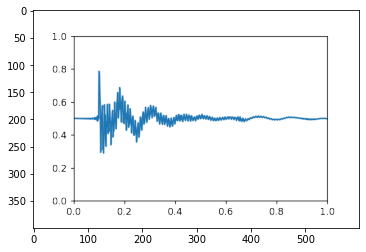

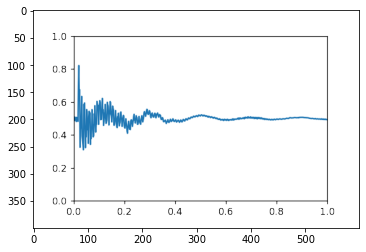

In [15]:
##AFFICHAGE DE LA CLASSE "2"

# print(y_pred_kmeans_4[0]) #c'est bien un 1
# print(len(y_pred_kmeans_4)) #c'est bien 162

two_ind = []
for i in range(len(y_pred_kmeans_4)):
    if y_pred_kmeans_4[i] == 2:
        two_ind.append(i)

print(len(two_ind)) #9

two_ind_str = [str(x).zfill(3) for x in two_ind]

print(two_ind_str[4]) #038

os.chdir(train_folder+pk_folder_train)
for file_name in os.listdir():
    if file_name.endswith("_vitesse.png"):
        prefix = file_name[:3] #_D_ ou _G_
        infix = file_name[3:6] #numéro du blochet
        
        if prefix == '_D_':
            if infix in two_ind_str:
                img = mpimg.imread(train_folder+pk_folder_train+file_name)
                imgplot = plt.imshow(img)
                plt.show()
        
        elif prefix == '_G_':
            nfx = int(infix)
            nfx += (len(y_pred_kmeans_4) // 2) #nombre pair par construction
            infix = str(nfx) #ceux de gauche sont lus après tous ceux de droite
            if infix in two_ind_str:
                img = mpimg.imread(train_folder+pk_folder_train+file_name)
                imgplot = plt.imshow(img)
                plt.show()

48
027


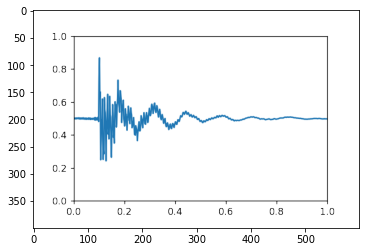

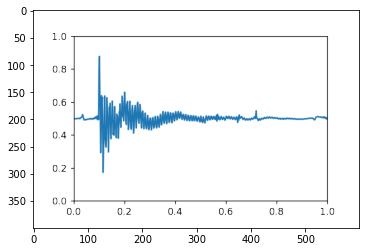

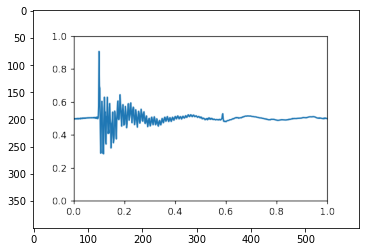

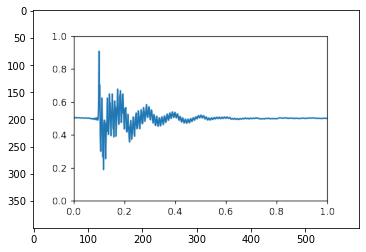

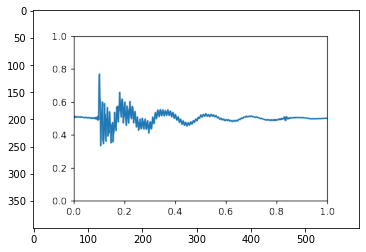

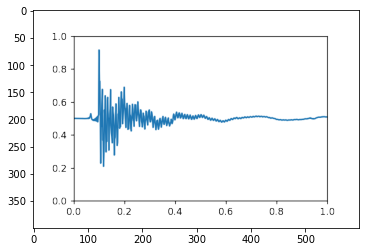

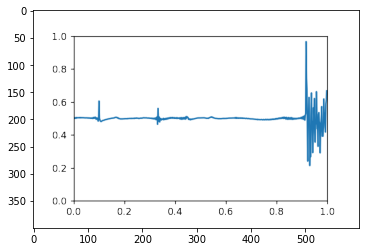

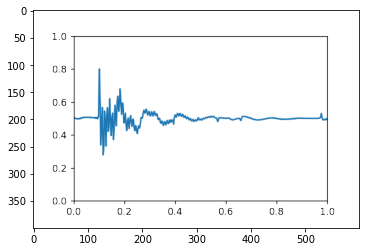

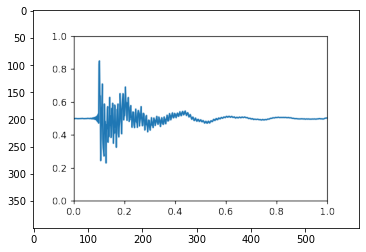

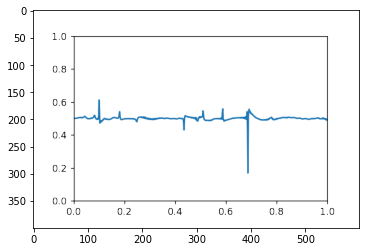

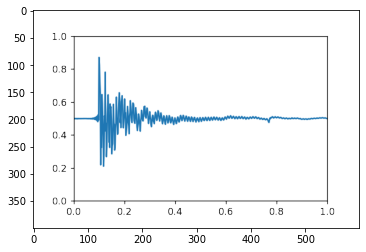

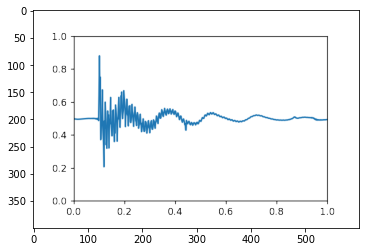

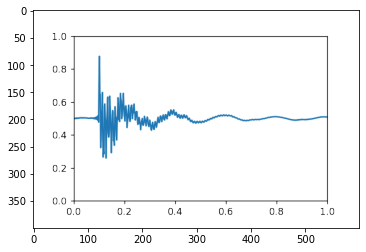

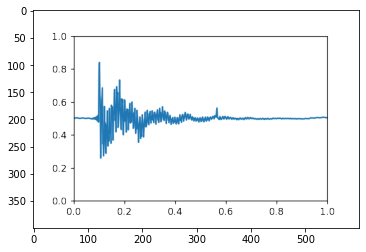

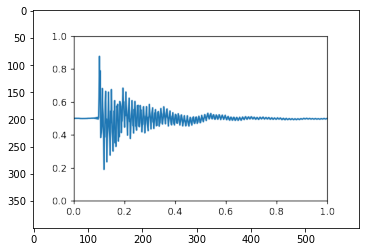

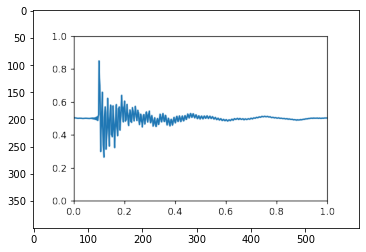

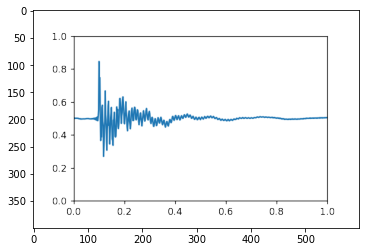

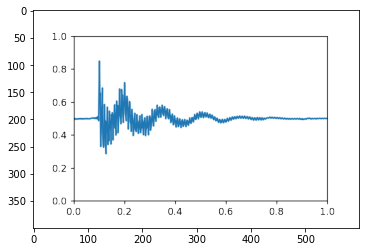

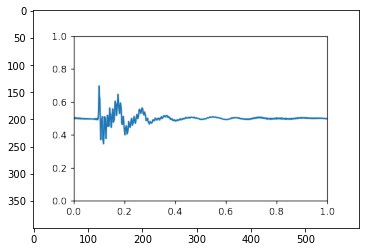

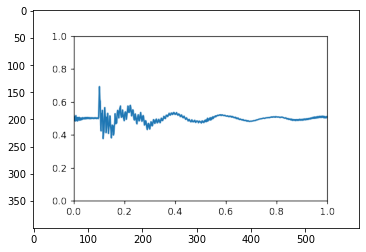

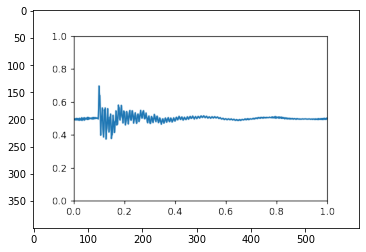

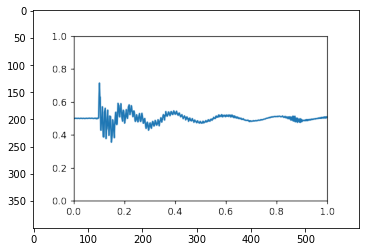

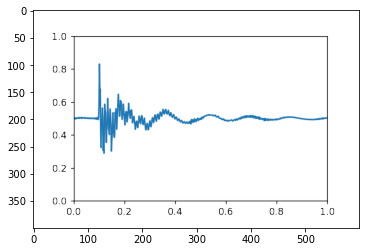

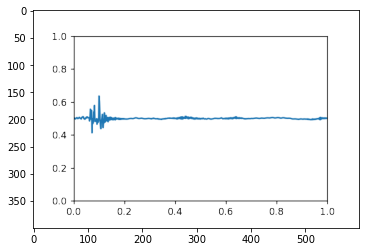

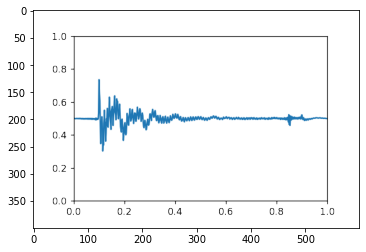

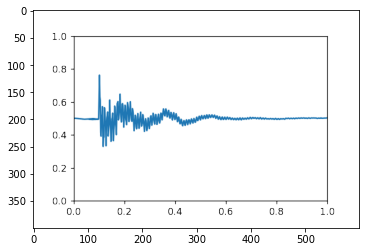

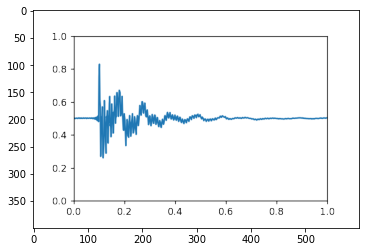

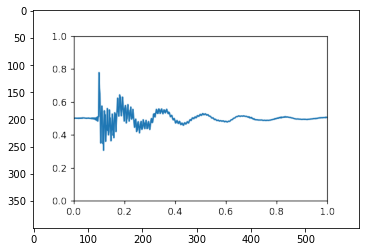

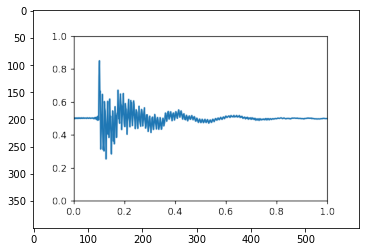

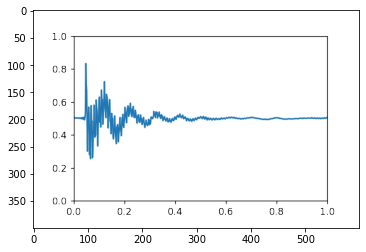

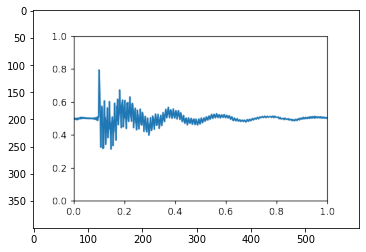

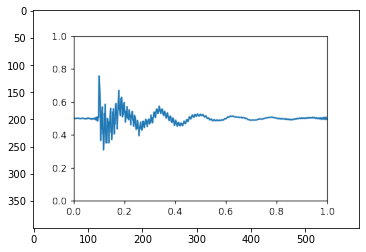

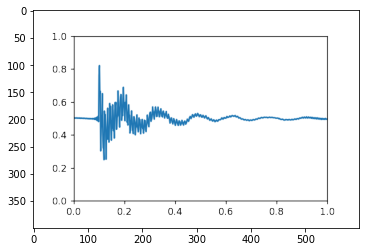

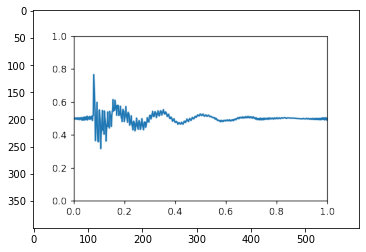

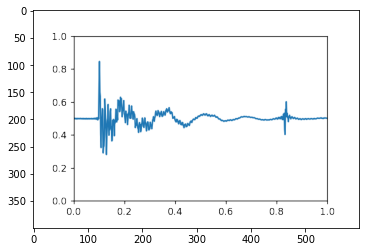

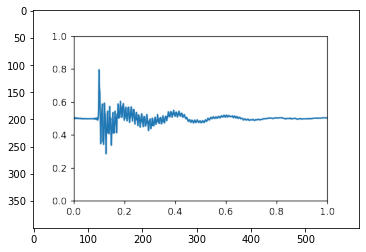

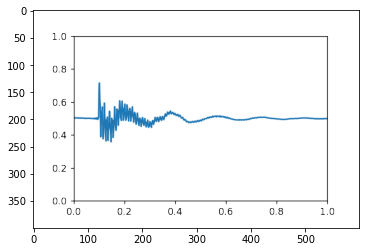

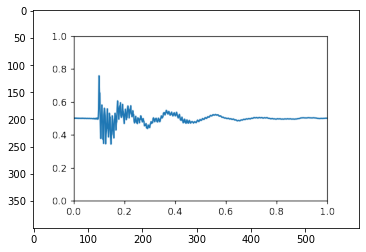

In [16]:
##AFFICHAGE DE LA CLASSE "1"

# print(y_pred_kmeans_4[0]) #c'est bien un 1
# print(len(y_pred_kmeans_4)) #c'est bien 162

one_ind = []
for i in range(len(y_pred_kmeans_4)):
    if y_pred_kmeans_4[i] == 1:
        one_ind.append(i)

print(len(one_ind)) #85

one_ind_str = [str(x).zfill(3) for x in one_ind]

print(one_ind_str[4]) #005

os.chdir(train_folder+pk_folder_train)
for file_name in os.listdir():
    if file_name.endswith("_vitesse.png"):
        prefix = file_name[:3] #_D_ ou _G_
        infix = file_name[3:6] #numéro du blochet
        
        if prefix == '_D_':
            if infix in one_ind_str:
                img = mpimg.imread(train_folder+pk_folder_train+file_name)
                imgplot = plt.imshow(img)
                plt.show()
        
        elif prefix == '_G_':
            nfx = int(infix)
            nfx += (len(y_pred_kmeans_4) // 2)
            infix = str(nfx) #ceux de gauche sont lus après tous ceux de droite
            if infix in one_ind_str:
                img = mpimg.imread(train_folder+pk_folder_train+file_name)
                imgplot = plt.imshow(img)
                plt.show()

35
017


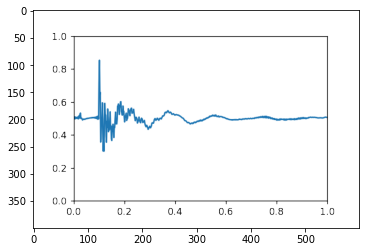

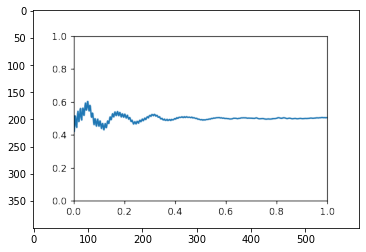

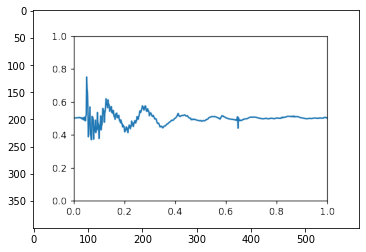

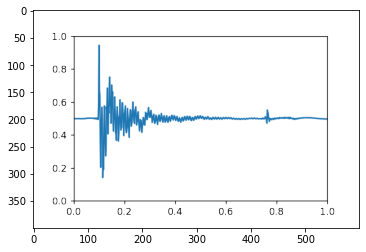

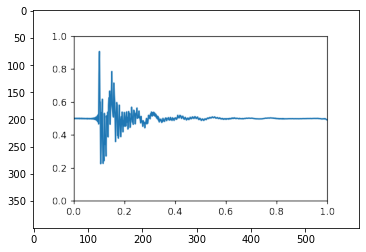

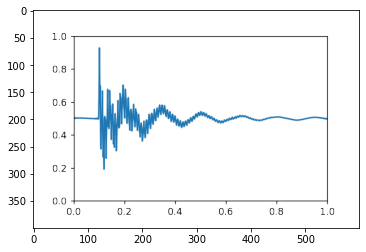

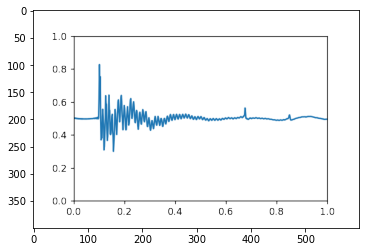

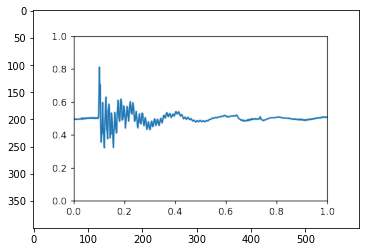

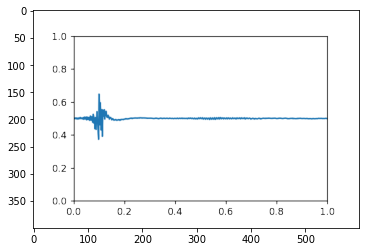

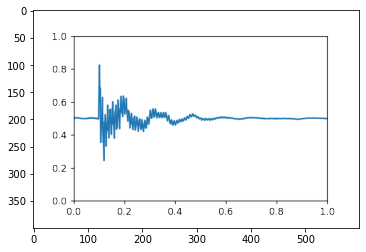

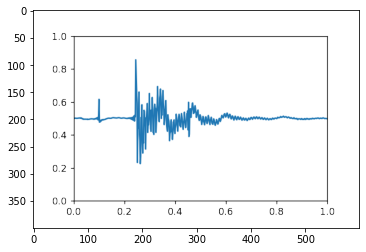

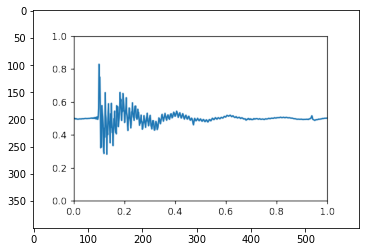

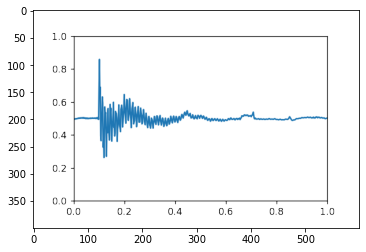

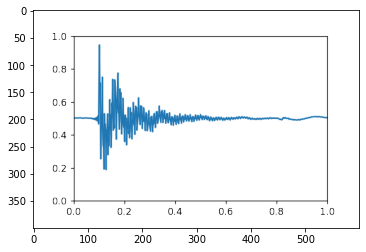

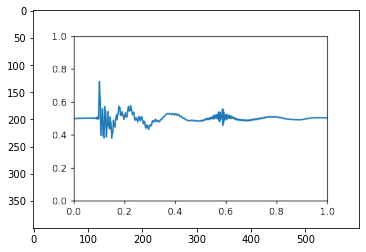

_G_024_vitesse.png


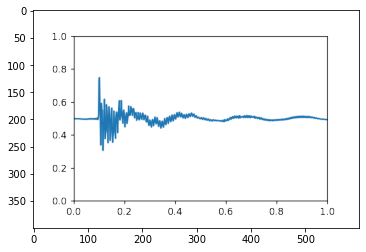

_G_026_vitesse.png


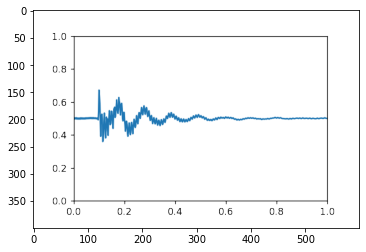

_G_027_vitesse.png


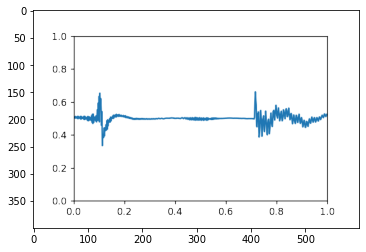

_G_028_vitesse.png


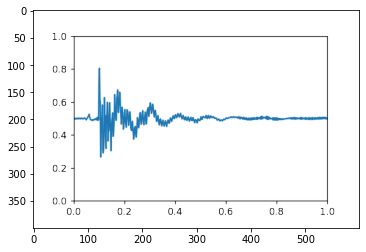

_G_031_vitesse.png


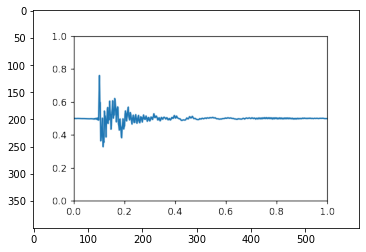

_G_032_vitesse.png


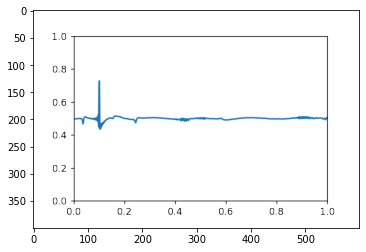

_G_033_vitesse.png


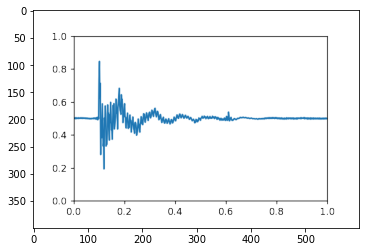

_G_035_vitesse.png


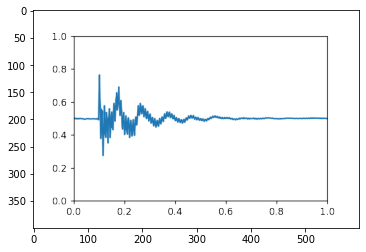

_G_038_vitesse.png


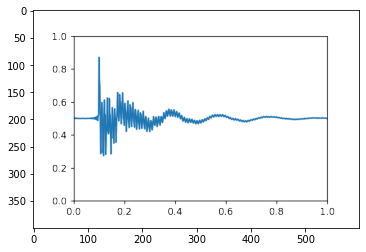

_G_044_vitesse.png


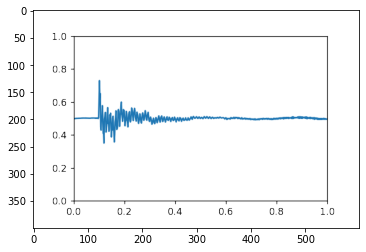

_G_048_vitesse.png


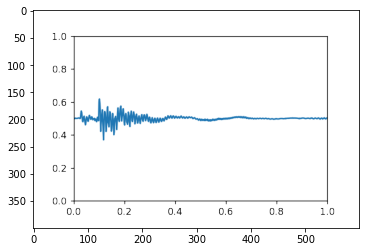

_G_049_vitesse.png


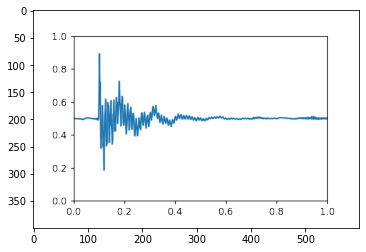

_G_055_vitesse.png


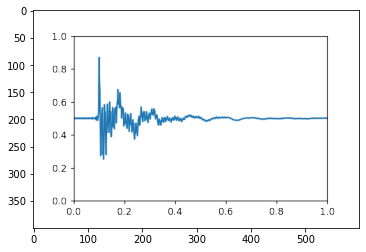

_G_059_vitesse.png


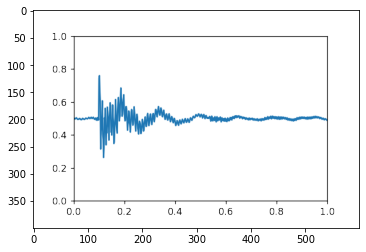

_G_068_vitesse.png


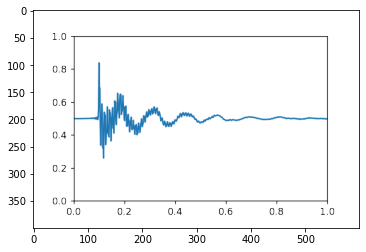

_G_074_vitesse.png


In [17]:
##AFFICHAGE DE LA CLASSE "0"

# print(y_pred_kmeans_4[0]) #c'est bien un 1
# print(len(y_pred_kmeans_4)) #c'est bien 162

zero_ind = []
for i in range(len(y_pred_kmeans_4)):
    if y_pred_kmeans_4[i] == 0:
        zero_ind.append(i)

print(len(zero_ind)) #13

zero_ind_str = [str(x).zfill(3) for x in zero_ind]

print(zero_ind_str[4]) #097

os.chdir(train_folder+pk_folder_train)
for file_name in os.listdir():
    if file_name.endswith("_vitesse.png"):
        prefix = file_name[:3] #_D_ ou _G_
        infix = file_name[3:6] #numéro du blochet
        
        if prefix == '_D_':
            if infix in zero_ind_str:
                img = mpimg.imread(train_folder+pk_folder_train+file_name)
                imgplot = plt.imshow(img)
                plt.show()
        
        elif prefix == '_G_':
            nfx = int(infix)
            nfx += (len(y_pred_kmeans_4) // 2)
            infix = str(nfx) #ceux de gauche sont lus après tous ceux de droite
            if infix in zero_ind_str:
                img = mpimg.imread(train_folder+pk_folder_train+file_name)
                imgplot = plt.imshow(img)
                plt.show()
                print(file_name)

CONCLUSIONS VITESSE:


La classe 1 est la même qu'avec K=3, il a partitionné les autres classes.

Impression que la discrimination de l'image se joue pas vraiment sur la qualité du signal (bruit etc) mais surtout sur la hauteur du transient. 
> ## => K Means n'est pas pertinent pour classifier le bruit, on cherche autre chose. ##

CONCLUSIONS FOURIER:


Création de très petites classes: Classe 2 a 9 elts, classe 0 en a 13 !
On va voir à quel point c'est significatif:

Classe 3: Effectif=55, globalement une bonne allure à part 2-3 courbes, mais niveau agitation c'est très variable
Classe 2: Effectif=9, rien de significatif
Classe 1: Effectif=85, très variable mais contient la plupart des signaux complètement détruits => mauvaise nouvelle, le modèle discrimine pas très bien ces signaux là des autres signaux alors qu'ils sont quand même très reconnaissables
Classe 0: Effectif=13, wtf ça affiche que la moitié des courbes ? Debug. On a que 7 courbes, globalement mauvaises, dur à juger.

> ## => K Means n'est pas pertinent pour classifier le bruit. Il faudrait peut-être aussi refaire les figures de façon plus lisible. Un spectrogramme n'est pas possible car signal n'évolue pas dans le temps... ##

In [ ]:
## ON AGREGE TOUTES LES IMAGES DE VITESSE DANS UNE DB

# x_train = []

# os.chdir(train_folder)
# for folder in os.listdir():
#     for file_name in os.listdir(train_folder + folder):
#         if file_name.endswith("vitesse.png"):
#             img_path = train_folder + folder + "/" + file_name
#             img = image.load_img(img_path, target_size=(600, 400))
#             x = image.img_to_array(img)
#             x = x.reshape((1,) + x.shape)
#             x = np.divide(x, 255.)
#             x_train.append(x)

# x_train_array = np.array(x_train)
# example = x_train_array[42]
# print(example[0, 372, 257, 2])

# #pour l'instant, comme on a pas de labels, on regarde "à la main" les classes générées automatiqt

# #K = 2
# kmeans_2 = KMeans(n_clusters=2, n_init=20, n_jobs=4)
# y_pred_kmeans_2 = kmeans_2.fit_predict(x_train_array)

# #K = 3
# kmeans_3 = KMeans(n_clusters=3, n_init=20, n_jobs=4)
# y_pred_kmeans_3 = kmeans_3.fit_predict(x_train_array)

